In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats

In [3]:
train_df=pd.read_csv("C:/Users/Samruddhi/Desktop/codealpha/train.csv")
df=train_df.copy()

C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_1900\426009815.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv("C:/Users/Samruddhi/Desktop/codealpha/train.csv")


In [4]:
print(df.head())



       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
print(df.describe().T)

                             count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.0000

In [7]:
print(df.describe(exclude=np.number).T)

                          count  unique                               top  \
ID                       100000  100000                           0x25fb6   
Customer_ID              100000   12500                        CUS_0x942c   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          17273.83   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   

In [8]:
df_train=df.copy()

In [9]:
df.shape

(100000, 28)

In [10]:
df_train.shape

(100000, 28)

In [11]:
for i in df_train:
    print('\n', i, df_train[i].unique())


 ID ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

 Name ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 SSN ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 

In [12]:
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())


In [13]:
def fill_missing_with_group_mode(df, groupby, column):      
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())
    
    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)
    
    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [14]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)

In [15]:

def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].min(), df[column].max())

    # Group by and get a list of values for each group
    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)

    # Safely extract the mode, ensuring that no IndexError or TypeError occurs
    def safe_mode(x):
        mode_result = stats.mode(x, nan_policy='omit')
        if isinstance(mode_result.mode, np.ndarray) and mode_result.mode.size > 0:  # Ensure mode_result.mode is not empty
            return mode_result.mode[0]
        else:
            return np.nan

    modes = df_dropped.apply(safe_mode)
    
    # Handle case where all modes might be NaN
    if modes.dropna().empty:
        mini, maxi = np.nan, np.nan  # No valid modes found
    else:
        mini, maxi = modes.min(), modes.max()

    # Assign values outside the range [mini, maxi] to NaN
    df[column] = df[column].apply(lambda x: np.nan if (x < mini or x > maxi or x < 0) else x)

    # Fill NaN values with the local mode by group
    mode_by_group = df.groupby(groupby)[column].transform(safe_mode)
    df[column] = df[column].fillna(mode_by_group)

    # Fill remaining NaN values with the overall column mean
    df[column] = df[column].fillna(df[column].mean())

    # Print cleaned min and max values, unique values, and remaining NaNs
    print("\nAfter Cleaning Min, Max Values:", df[column].min(), df[column].max())
    print("\nNo. of Unique values after Cleaning:", df[column].nunique())
    print("\nNo. of Null values after Cleaning:", df[column].isnull().sum())


In [16]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
        
    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)

In [17]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [18]:
def plot_displot(df,column,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{column} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [19]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [20]:
print(df_train.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [21]:
#month
get_column_details(df_train,'Month')

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


In [22]:
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [23]:
#Occupation
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0


In [24]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='int')

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
2840       1
6007       1
3904       1
333        1
4382       1
Name: count, Length: 1788, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int

Existing Min, Max Values: -500 8698

After Cleaning Min, Max Values: 14.0 8698.0

No. of Unique values after Cleaning: 1728

No. of Null values after Cleaning: 0


In [25]:
#Annual_Income
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

Annual_Income
17273.83      16
20867.67      16
36585.12      16
9141.63       15
95596.35      15
              ..
114389.24_     1
64650.48_      1
23589996.0     1
15762.82_      1
92047.08_      1
Name: count, Length: 18940, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float

Existing Min, Max Values: 7005.93 24198062.0

After Cleaning Min, Max Values: 7005.93 24198062.0

No. of Unique values after Cleaning: 13487

No. of Null values after Cleaning: 0


In [26]:
#Monthly_Inhand_Salary
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
#Get Details
get_column_details(df_train,column_name)
#Cleaning
clean_numerical_field(df_train,group_by,column_name)

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

Monthly_Inhand_Salary
6082.187500     15
2295.058333     15
6769.130000     15
6358.956667     15
3080.555000     14
                ..
11102.135322     1
1904.390000      1
1023.217588      1
9525.400376      1
1069.950000      1
Name: count, Length: 13235, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values: 303.6454166666666 15204.633333333331

After Cleaning Min, Max Values: 303.6454166666666 15204.633333333331

No. of Unique values after Cleaning: 13236

No. of Null values after Cleaning: 0


In [27]:
#Num_Bank_Accounts
column_name='Num_Bank_Accounts'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
665         1
1388        1
1429        1
1588        1
1777        1
Name: count, Length: 943, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Num_Bank_Accounts is changed to <class 'float'>

Existing Min, Max Values: -1.0 1798.0

After Cleaning Min, Max Values: 0.0 1798.0

No. of Unique values after Cleaning: 943

No. of Null values after Cleaning: 0


In [28]:
#Num_Credit_Card
column_name='Num_Credit_Card'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

Num_Credit_Card
5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
551        1
426        1
784        1
673        1
599        1
Name: count, Length: 1179, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Num_Credit_Card is changed to <class 'float'>

Existing Min, Max Values: 0.0 1499.0

After Cleaning Min, Max Values: 0.0 1499.0

No. of Unique values after Cleaning: 1179

No. of Null values after Cleaning: 0


In [29]:
#Interest_Rate
column_name='Interest_Rate'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
3831       1
4425       1
4446       1
2077       1
3032       1
Name: count, Length: 1750, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Interest_Rate is changed to <class 'float'>

Existing Min, Max Values: 1.0 5797.0

After Cleaning Min, Max Values: 1.0 5797.0

No. of Unique values after Cleaning: 1750

No. of Null values after Cleaning: 0


In [30]:
#Num_of_Loan
column_name='Num_of_Loan'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)


Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

Num_of_Loan
3       14386
2       14250
4       14016
0       10380
1       10083
        ...  
640         1
92_         1
1019        1
897         1
1091        1
Name: count, Length: 434, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Existing Min, Max Values: -100.0 1496.0

After Cleaning Min, Max Values: 0.0 1496.0

No. of Unique values after Cleaning: 414

No. of Null values after Cleaning: 0


In [31]:
#Type_of_Loan
column_name='Type_of_Loan'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                        1408
Credit-Builder Loan                                                                                  1280
Personal Loan                                                                                        1272
Debt Consolidation Loan                                                                              1264
Student Loan                                                                                         1240
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8


In [32]:
df_train['Type_of_Loan'].replace([np.nan],'Not Specified ',inplace=True)
get_column_details(df_train,column_name)

Details of Type_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  6261

Distribution of column:

Type_of_Loan
Not Specified                                                                                        11408
Not Specified                                                                                         1408
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         

C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_1900\3916896211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Type_of_Loan'].replace([np.nan],'Not Specified ',inplace=True)


In [33]:
#Delay_from_due_date
column_name='Delay_from_due_date'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values: -5 67

After Cleaning Min, Max Values: 0.0 67.0

No. of Unique values after Cleaning: 69

No. of Null values after Cleaning: 0


In [34]:
# Num_of_Delayed_Payment
column_name='Num_of_Delayed_Payment'
group_by='Customer_ID'
get_column_details(df_train,column_name)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
3336       1
3392       1
3688       1
221        1
2636       1
Name: count, Length: 749, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values: -3.0 4397.0

After Cleaning Min, Max Values: 0.0 4397.0

No. of Unique values after Cleaning: 709

No. of Null values after Cleaning: 0


In [35]:
# Changed_Credit_Limit
column_name='Changed_Credit_Limit'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
27.38                    1
21.17                    1
0.8199999999999998       1
30.91                    1
-6.2                     1
Name: count, Length: 4384, dtype: int64


In [36]:
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float',replace_value='_')


-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float

Existing Min, Max Values: -6.49 36.97

After Cleaning Min, Max Values: 0.0 36.97

No. of Unique values after Cleaning: 3724

No. of Null values after Cleaning: 0


In [37]:
#Num_Credit_Inquiries
column_name='Num_Credit_Inquiries'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
719.0         1
2239.0        1
2001.0        1
1953.0        1
2473.0        1
Name: count, Length: 1223, dtype: int64


In [38]:
clean_numerical_field(df_train,group_by,column_name)


-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values: 0.0 2597.0

After Cleaning Min, Max Values: 0.0 2597.0

No. of Unique values after Cleaning: 1224

No. of Null values after Cleaning: 0


In [39]:
#Credit_Mix 
column_name='Credit_Mix'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64


In [40]:
clean_categorical_field(df_train,group_by,column_name,replace_value='_')


-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195

No. of missing values after filling with group mode: 0


In [41]:
#Outstanding_Debt
column_name='Outstanding_Debt'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

Outstanding_Debt
1360.45     24
1109.03     23
1151.7      23
460.46      23
208.96      16
            ..
860.37_      1
290.39_      1
2866.5_      1
1472.86_     1
2797.17_     1
Name: count, Length: 13178, dtype: int64


In [42]:
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')


-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to float

Existing Min, Max Values: 0.23 4998.07

After Cleaning Min, Max Values: 0.23 4998.07

No. of Unique values after Cleaning: 12203

No. of Null values after Cleaning: 0


In [43]:
#Credit_Utilization_Ratio
column_name='Credit_Utilization_Ratio'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

Credit_Utilization_Ratio
27.289440    1
33.494867    1
31.738359    1
30.625298    1
23.140640    1
            ..
31.377862    1
24.797347    1
27.262259    1
22.537593    1
23.933795    1
Name: count, Length: 100000, dtype: int64


In [44]:
# Credit_History_Age 
column_name='Credit_History_Age'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Credit_History_Age column

DataType:  object

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64


In [45]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)


In [46]:
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')


-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to float

Existing Min, Max Values: 1.0 404.0

After Cleaning Min, Max Values: 1.0 404.0

No. of Unique values after Cleaning: 405

No. of Null values after Cleaning: 0


In [47]:
# Payment_of_Min_Amount
column_name='Payment_of_Min_Amount'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [48]:
#Amount_invested_monthly
column_name='Amount_invested_monthly'
group_by='Customer_ID'
get_column_details(df_train,column_name)


Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

Amount_invested_monthly
__10000__             4305
0.0                    169
167.1638651610451        1
80.41529543900253        1
118.28022162236736       1
                      ... 
78.51494451125625        1
114.8504246633256        1
31.19391926667726        1
450.6460933992599        1
187.3559686116327        1
Name: count, Length: 91049, dtype: int64


In [49]:
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')


-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to float

Existing Min, Max Values: 0.0 10000.0

After Cleaning Min, Max Values: 0.0 10000.0

No. of Unique values after Cleaning: 91050

No. of Null values after Cleaning: 0


In [50]:
# Payment_Behaviour
column_name='Payment_Behaviour'
group_by='Customer_ID'
get_column_details(df_train,column_name)


Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64


In [51]:
clean_categorical_field(df_train,group_by,column_name,replace_value='!@9#%8')


-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0


In [52]:
# Monthly_Balance
column_name='Monthly_Balance'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

Monthly_Balance
__-333333333333333333333333333__    9
310.883806                          1
446.671142                          1
356.07810855965045                  1
393.673696                          1
                                   ..
520.662207                          1
151.210033                          1
394.500158                          1
350.982329                          1
364.00001570479753                  1
Name: count, Length: 98792, dtype: int64


In [53]:
df_train[column_name].replace('',np.nan)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')


-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Existing Min, Max Values: 0.007759664775335295 1602.0405189622518


C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_1900\1217296871.py:9: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mode_result = stats.mode(x, nan_policy='omit')



After Cleaning Min, Max Values: 0.007759664775335295 1602.0405189622518

No. of Unique values after Cleaning: 97124

No. of Null values after Cleaning: 0


In [54]:
# Credit_Score
column_name='Credit_Score'
group_by='Customer_ID'
get_column_details(df_train,column_name)

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [55]:
clean_categorical_field(df_train,group_by,column_name)


-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 0

No. of missing values after filling with group mode: 0


In [58]:
drop_colnum=['ID','Customer_ID','Name','SSN']
df_train.drop(drop_colnum,axis=1,inplace=True)


In [61]:
print(df_train.shape)
print(df_train.describe)

(100000, 24)
<bound method NDFrame.describe of        Month         Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1   23.000000  Scientist       19114.12            1824.843333   
1          2   23.000000  Scientist       19114.12            4194.170850   
2          3  116.108421  Scientist       19114.12            4194.170850   
3          4   23.000000  Scientist       19114.12            4194.170850   
4          5   23.000000  Scientist       19114.12            1824.843333   
...      ...         ...        ...            ...                    ...   
99995      4   25.000000   Mechanic       39628.99            3359.415833   
99996      5   25.000000   Mechanic       39628.99            3359.415833   
99997      6   25.000000   Mechanic       39628.99            3359.415833   
99998      7   25.000000   Mechanic       39628.99            3359.415833   
99999      8   25.000000   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Nu

In [63]:
from sklearn.preprocessing import LabelEncoder
label_col=['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
label_encoder=LabelEncoder()
for col in label_col:
    df_train[col]=label_encoder.fit_transform(df_train[col])

In [64]:
df_train.head

<bound method NDFrame.head of        Month         Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1   23.000000          12       19114.12            1824.843333   
1          2   23.000000          12       19114.12            4194.170850   
2          3  116.108421          12       19114.12            4194.170850   
3          4   23.000000          12       19114.12            4194.170850   
4          5   23.000000          12       19114.12            1824.843333   
...      ...         ...         ...            ...                    ...   
99995      4   25.000000           9       39628.99            3359.415833   
99996      5   25.000000           9       39628.99            3359.415833   
99997      6   25.000000           9       39628.99            3359.415833   
99998      7   25.000000           9       39628.99            3359.415833   
99999      8   25.000000           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Cre

In [65]:
x=df_train.drop('Credit_Score',axis=1)
y=df_train['Credit_Score']
print(x.shape)
print(y.shape)

(100000, 23)
(100000,)


In [66]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [67]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=0.2,stratify=y)


classification report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3566
           1       0.79      0.82      0.80      5799
           2       0.84      0.81      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



<Axes: >

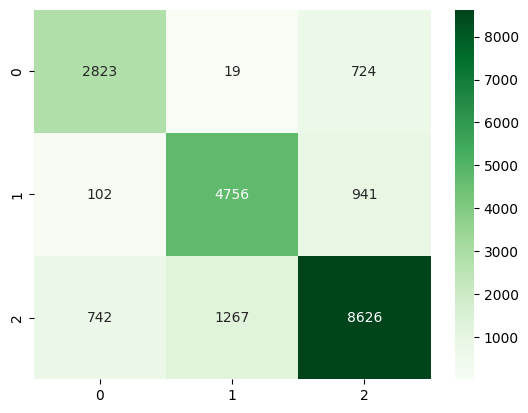

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,classification_report
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("classification report")
print(classification_report(y_test,y_pred))
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True, cmap='Greens',fmt='.0f')

In [72]:
print(y_pred)

[1 2 0 ... 1 0 1]


In [75]:
y_test

8046     1
65245    2
359      0
82764    2
81149    2
        ..
85806    1
25578    0
16659    2
72224    0
50172    1
Name: Credit_Score, Length: 20000, dtype: int64